Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'MaxHR',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'thalach'],
      dtype='object')


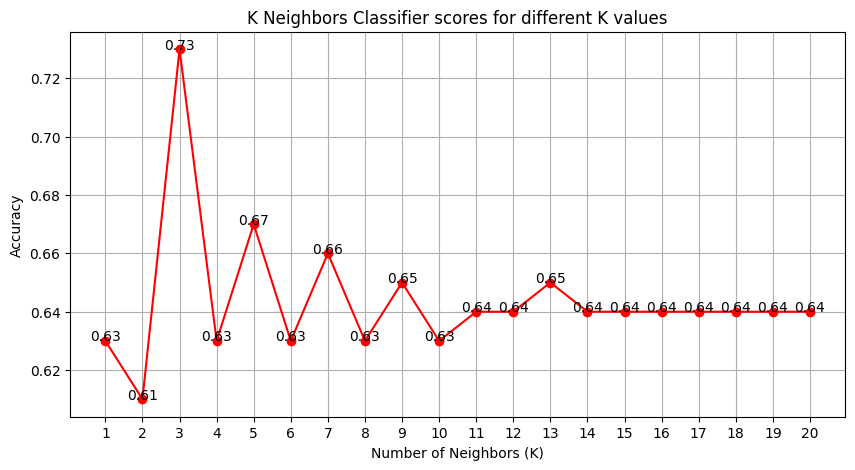

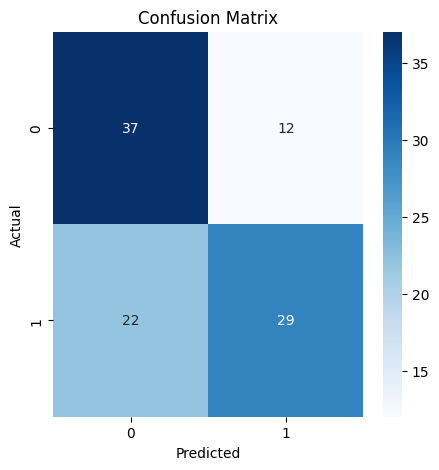

In [ ]:
# knn
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline (remove if not in Jupyter)
# %matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Load dataset
dataset = pd.read_csv("/kaggle/Heart.csv")

# Drop unnecessary unnamed column if it exists
if 'Unnamed: 0' in dataset.columns:
    dataset = dataset.drop('Unnamed: 0', axis=1)

# Debug: See column names
print("Columns:", dataset.columns)

# Fix 'thalach' column if it's Yes/No
if dataset['thalach'].dtype == object and set(dataset['thalach'].unique()).issubset({'Yes', 'No'}):
    dataset['target'] = dataset['thalach'].map({'Yes': 1, 'No': 0})
    dataset = dataset.drop('thalach', axis=1)
else:
    # If 'thalach' is numeric (MaxHR), assume target is named 'target' already
    pass

# Convert categorical text features to dummies
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    if col in dataset.columns:
        dataset = pd.get_dummies(dataset, columns=[col])

# Standardize numerical columns
columns_to_scale = ['age', 'trestbps', 'chol', 'oldpeak']
if 'thalach' in dataset.columns and dataset['thalach'].dtype != object:
    columns_to_scale.append('thalach')

scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Check if 'target' exists
if 'target' not in dataset.columns:
    raise ValueError("Target variable not found. Please ensure 'target' or 'thalach' column is correctly labeled.")

# Split features and target
X = dataset.drop(['target'], axis=1)
y = dataset['target']

# Split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# KNN Accuracy for different k values
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

# Plot accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot([k for k in range(1, 21)], knn_scores, color='red', marker='o')
for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], f"{knn_scores[i - 1]:.2f}", ha='center')
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K Neighbors Classifier scores for different K values')
plt.grid(True)
plt.show()

# Final model with best K (example: 7)
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Confusion matrix for kernel = 'linear':
[[44  5]
 [15 36]]

Confusion matrix for kernel = 'poly':
[[36 13]
 [23 28]]

Confusion matrix for kernel = 'rbf':
[[42  7]
 [28 23]]

Confusion matrix for kernel = 'sigmoid':
[[47  2]
 [50  1]]


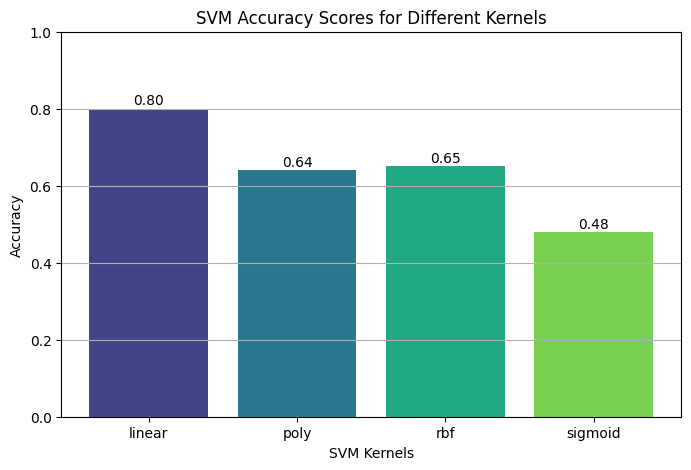

In [ ]:
# SVM Classifier for Heart Disease Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Load dataset
dataset = pd.read_csv("/kaggle/Heart.csv")

# Drop unnecessary column if present
if 'Unnamed: 0' in dataset.columns:
    dataset = dataset.drop('Unnamed: 0', axis=1)

# Convert 'thalach' to target if it's Yes/No
if dataset['thalach'].dtype == object and set(dataset['thalach'].unique()).issubset({'Yes', 'No'}):
    dataset['target'] = dataset['thalach'].map({'Yes': 1, 'No': 0})
    dataset = dataset.drop('thalach', axis=1)

# One-hot encode categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    if col in dataset.columns:
        dataset = pd.get_dummies(dataset, columns=[col])

# Standardize numerical columns
columns_to_scale = ['age', 'trestbps', 'chol', 'oldpeak']
if 'thalach' in dataset.columns and dataset['thalach'].dtype != object:
    columns_to_scale.append('thalach')

scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Prepare input and target
if 'target' not in dataset.columns:
    raise ValueError("Target column not found. Please verify 'target' or 'thalach' mapping.")

X = dataset.drop('target', axis=1)
y = dataset['target']

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Try different SVM kernels
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(x_train, y_train)
    y_pred = svc_classifier.predict(x_test)
    score = svc_classifier.score(x_test, y_test)
    svc_scores.append(score)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion matrix for kernel = '{kernel}':")
    print(cm)

# Plot scores for each kernel
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(kernels)))
plt.figure(figsize=(8, 5))
plt.bar(kernels, svc_scores, color=colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i] + 0.01, f"{svc_scores[i]:.2f}", ha='center')
plt.ylim(0, 1)
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy Scores for Different Kernels')
plt.grid(axis='y')
plt.show()


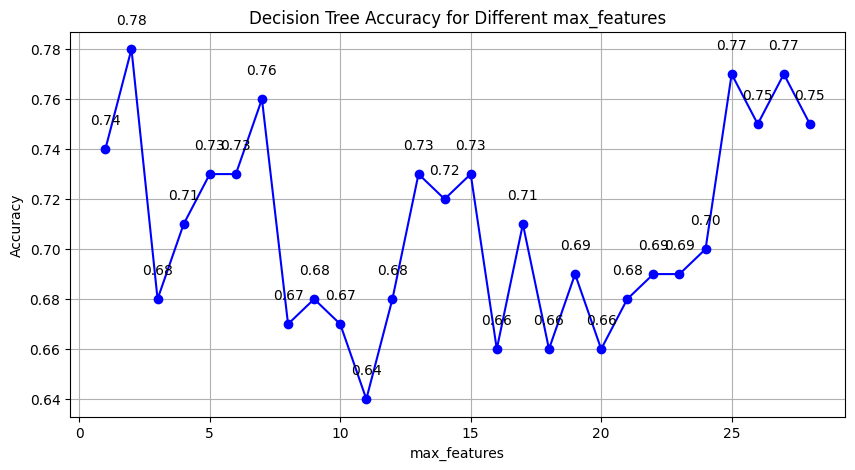

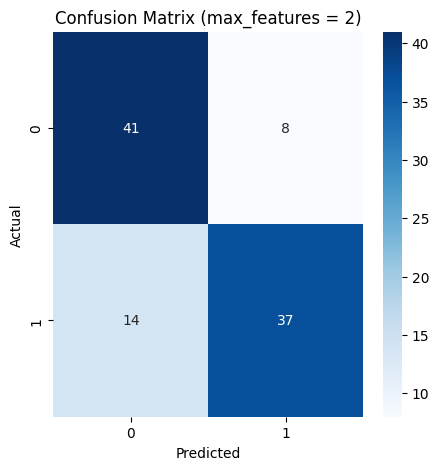

In [ ]:
# Decision Tree Classifier for Heart Disease Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load dataset
dataset = pd.read_csv("/kaggle/Heart.csv")

# Drop unnecessary index column if present
if 'Unnamed: 0' in dataset.columns:
    dataset = dataset.drop('Unnamed: 0', axis=1)

# Convert 'thalach' to target if it's 'Yes'/'No'
if dataset['thalach'].dtype == object and set(dataset['thalach'].unique()).issubset({'Yes', 'No'}):
    dataset['target'] = dataset['thalach'].map({'Yes': 1, 'No': 0})
    dataset = dataset.drop('thalach', axis=1)

# One-hot encode categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    if col in dataset.columns:
        dataset = pd.get_dummies(dataset, columns=[col])

# Normalize numerical features
columns_to_scale = ['age', 'trestbps', 'chol', 'oldpeak']
if 'thalach' in dataset.columns and dataset['thalach'].dtype != object:
    columns_to_scale.append('thalach')

scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Prepare input and target variables
if 'target' not in dataset.columns:
    raise ValueError("Target column not found. Please check 'target' or 'thalach' mapping.")

X = dataset.drop('target', axis=1)
y = dataset['target']

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Try Decision Tree with varying max_features
dt_scores = []
feature_range = range(1, len(X.columns) + 1)

for i in feature_range:
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(x_train, y_train)
    score = dt_classifier.score(x_test, y_test)
    dt_scores.append(score)

# Plot accuracy for different max_features
plt.figure(figsize=(10, 5))
plt.plot(feature_range, dt_scores, color='blue', marker='o')
for i, score in enumerate(dt_scores):
    plt.text(i + 1, score + 0.01, f"{score:.2f}", ha='center')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Different max_features')
plt.grid(True)
plt.show()

# Train final model with best max_features
best_features = dt_scores.index(max(dt_scores)) + 1
dt_classifier = DecisionTreeClassifier(max_features=best_features, random_state=0)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title(f'Confusion Matrix (max_features = {best_features})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


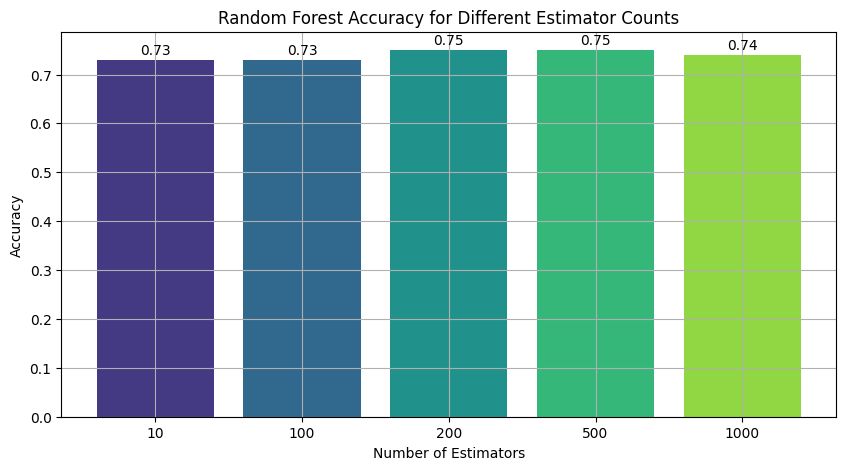

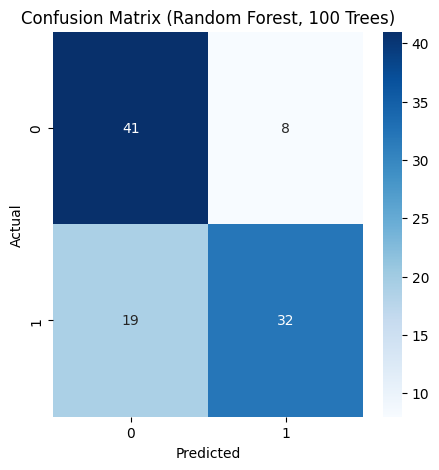

In [ ]:
# Random Forest Classifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Load dataset
dataset = pd.read_csv("/kaggle/Heart.csv")

# Drop unnecessary index column if exists
if 'Unnamed: 0' in dataset.columns:
    dataset = dataset.drop('Unnamed: 0', axis=1)

# Convert 'thalach' to binary target if it contains 'Yes'/'No'
if dataset['thalach'].dtype == object and set(dataset['thalach'].unique()).issubset({'Yes', 'No'}):
    dataset['target'] = dataset['thalach'].map({'Yes': 1, 'No': 0})
    dataset = dataset.drop('thalach', axis=1)

# One-hot encode categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    if col in dataset.columns:
        dataset = pd.get_dummies(dataset, columns=[col])

# Normalize numerical columns
columns_to_scale = ['age', 'trestbps', 'chol', 'oldpeak']
if 'thalach' in dataset.columns and dataset['thalach'].dtype != object:
    columns_to_scale.append('thalach')

scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Split dataset
if 'target' not in dataset.columns:
    raise ValueError("Target column not found. Ensure 'thalach' was converted or 'target' exists.")

X = dataset.drop('target', axis=1)
y = dataset['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Test different n_estimators
rf_scores = []
estimators = [10, 100, 200, 500, 1000]

for n in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=0)
    rf_classifier.fit(x_train, y_train)
    score = rf_classifier.score(x_test, y_test)
    rf_scores.append(score)

# Plot accuracy for different number of estimators
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(estimators))
bars = plt.bar([str(e) for e in estimators], rf_scores, color=colors)
for bar, score in zip(bars, rf_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{score:.2f}", ha='center', va='bottom')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Different Estimator Counts')
plt.grid(True)
plt.show()

# Final model with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix (Random Forest, 100 Trees)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.9016393442622951


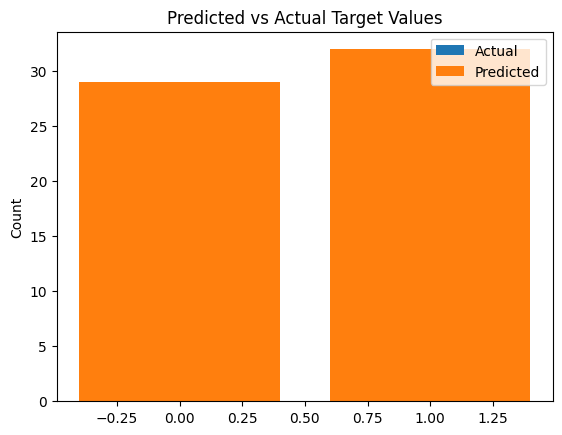

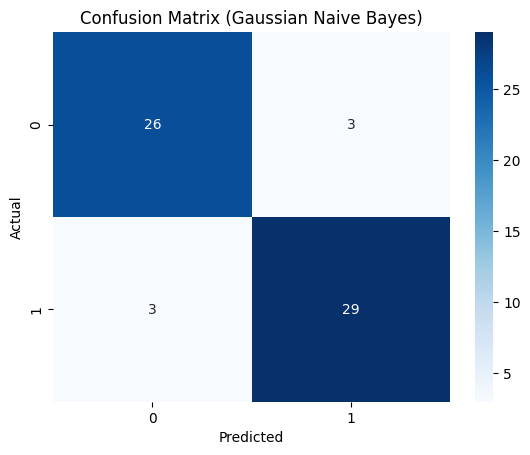

In [ ]:
# gauss naive bayes
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/Heart.csv")

# Drop unnecessary index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Convert 'thalach' to binary target if it contains 'Yes'/'No'
if df['thalach'].dtype == object and set(df['thalach'].unique()).issubset({'Yes', 'No'}):
    df['target'] = df['thalach'].map({'Yes': 1, 'No': 0})
    df = df.drop('thalach', axis=1)

# One-hot encode categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col])

# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier on the training data
nb.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the predicted vs actual target values
fig, ax = plt.subplots()
ax.bar([0, 1], [sum(y_test==0), sum(y_test==1)], label='Actual')
ax.bar([0, 1], [sum(y_pred==0), sum(y_pred==1)], label='Predicted')
ax.set_ylabel('Count')
ax.set_title('Predicted vs Actual Target Values')
ax.legend()
plt.show()

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix (Gaussian Naive Bayes)")

# Show the plot
plt.show()


Accuracy: 0.8360655737704918
Confusion Matrix:
[[24  5]
 [ 5 27]]


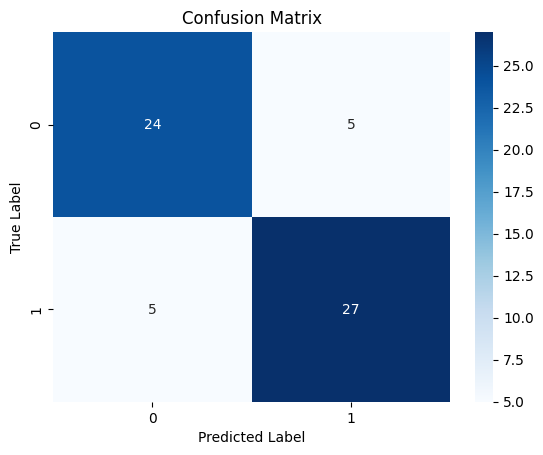

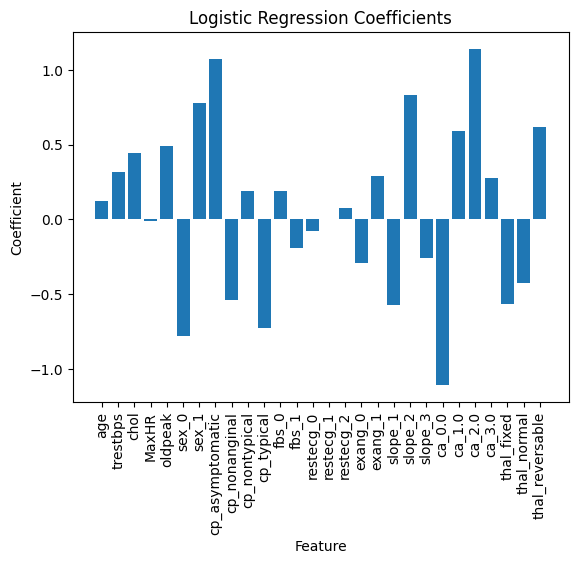

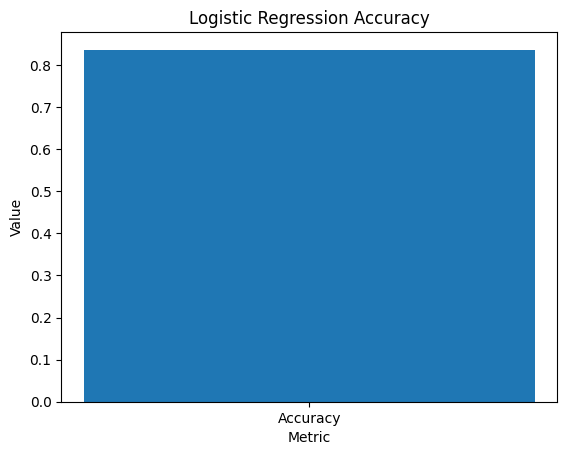

In [ ]:
# Logistics regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("/kaggle/Heart.csv")

# Drop unnecessary index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Check for 'thalach' and remove it if it doesn't exist
if 'thalach' in df.columns:
    # Convert 'thalach' to binary target if it contains 'Yes'/'No'
    if df['thalach'].dtype == object and set(df['thalach'].unique()).issubset({'Yes', 'No'}):
        df['target'] = df['thalach'].map({'Yes': 1, 'No': 0})
        df = df.drop('thalach', axis=1)

# One-hot encode categorical variables
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_columns:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col])

# Standardize features for Logistic Regression
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the coefficients of the model
coef = model.coef_.flatten()
features = X.columns.tolist()
plt.bar(features, coef)
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

# Plot the accuracy
plt.bar(["Accuracy"], [accuracy])
plt.title("Logistic Regression Accuracy")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.show()


In [ ]:
# ann
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("/kaggle/Heart.csv")

# 2. Drop the auto‑index column if present
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# 3. Create binary target from your Yes/No 'thalach' column
df['target'] = df['thalach'].map({'Yes': 1, 'No': 0})
df.drop('thalach', axis=1, inplace=True)

# 4. One‑hot encode the remaining categorical features
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 5. Separate features/target
X = df.drop('target', axis=1)
y = df['target']

# 6. Scale numeric columns
num_cols = ['age', 'trestbps', 'chol', 'MaxHR', 'oldpeak']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 7. Convert target to categorical (2 classes)
y_cat = to_categorical(y, num_classes=2)

# 8. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, stratify=y, test_size=0.2, random_state=42
)

# 9. Build the Keras model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(16,
                    input_dim=input_dim,
                    kernel_initializer='normal',
                    kernel_regularizer=regularizers.l2(0.01),
                    activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8,
                    kernel_initializer='normal',
                    kernel_regularizer=regularizers.l2(0.01),
                    activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    optimizer = Adam(learning_rate=0.001)  # correct argument name
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model(X_train.shape[1])
print(model.summary())

# 10. Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=10
)

# 11. Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

# 12. Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/Heart.csv'